In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset5.csv')
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
df.dropna(subset=['LATITUDE', 'LONGITUDE','LOCATION'],inplace=True)
df = df[df['LATITUDE']!=0]
df = df[df['LONGITUDE']!=0]
for col in df.columns:
    print(col)

# df['NUMBER OF PERSONS KILLED']
# df['TOTAL DEATHS'] = df['NUMBER OF PEDESTRIANS KILLED']+df['NUMBER OF CYCLIST KILLED']+df['NUMBER OF MOTORIST KILLED']

Unnamed: 0
CRASH DATE
CRASH TIME
BOROUGH
ZIP CODE
LATITUDE
LONGITUDE
LOCATION
ON STREET NAME
CROSS STREET NAME
OFF STREET NAME
NUMBER OF PERSONS INJURED
NUMBER OF PERSONS KILLED
NUMBER OF PEDESTRIANS INJURED
NUMBER OF PEDESTRIANS KILLED
NUMBER OF CYCLIST INJURED
NUMBER OF CYCLIST KILLED
NUMBER OF MOTORIST INJURED
NUMBER OF MOTORIST KILLED
CONTRIBUTING FACTOR VEHICLE 1
CONTRIBUTING FACTOR VEHICLE 2
COLLISION_ID
VEHICLE TYPE CODE 1
VEHICLE TYPE CODE 2


In [2]:
groupingDictionary = {
    "Distraction" : ["Driver Inattention/Distraction", "Outside Car Distraction", "Passenger Distraction", "Glare", "Cell Phone (hand-held)", "Cell Phone (hands-free)", "Other Electronic Device"], 
    "Car Defects" : ["Accelerator Defective", "Brakes Defective", "Headlights Defective", "Other Lighting Defects", "Steering Failure", "Tire Failure/Inadequate", "Tow Hitch Defective", "Windshield Inadequate"],
    "Substance Abuse" : ["Alcohol Involvement", "Drugs (Illegal)", "Prescription Medication"],
    "Driver not at fault" : ["Animals Action", "Lane Marking Improper/Inadequate", "Obstruction/Debris", "Other Vehicular", "Pavement Defective", "Pavement Slippery", "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "Reaction to Other Uninvolved Vehicle", "Shoulders Defective/Improper", "Traffic Control Device Improper/Non-Working", "View Obstructed/Limited"], 
    "Driver Inexperience" : ["Driver Inexperience"], 
    "Medical/Fatigue" : ["Fatigued/Drowsy", "Fell Asleep", "Illness", "Lost Consciousness", "Physical Disability"], 
    "Traffic Rule Violation" : ["Aggressive Driving/Road Rage", "Backing Unsafely", "Failure to Keep Right", "Failure to Yield Right-of-Way", "Following Too Closely", "Oversized Vehicle", "Passing Too Closely", "Passing or Lane Usage Improper", "Traffic Control Disregarded", "Turning Improperly", "Unsafe Lane Changing", "Unsafe Speed"]
}

In [3]:
df = df[df['CONTRIBUTING FACTOR VEHICLE 1']!="Unspecified"]

In [4]:
def custom_acc_type(row):
    for j in groupingDictionary.keys():
       if row['CONTRIBUTING FACTOR VEHICLE 1'] in groupingDictionary[j]:
           return j

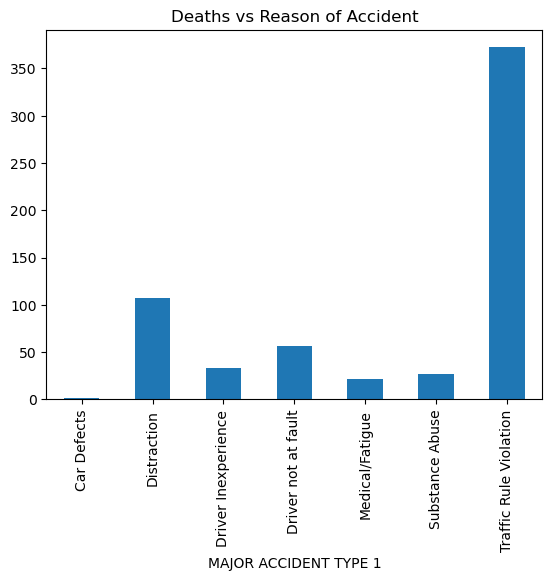

In [5]:
df['MAJOR ACCIDENT TYPE 1'] = df.apply(custom_acc_type,axis=1)

df2 = df.groupby(by='MAJOR ACCIDENT TYPE 1')['NUMBER OF PERSONS KILLED'].sum()
df3 = df.groupby(by='MAJOR ACCIDENT TYPE 1')['NUMBER OF PERSONS INJURED'].sum()

valDict  ={}
df2.plot.bar()
plt.title("Deaths vs Reason of Accident")
plt.show()


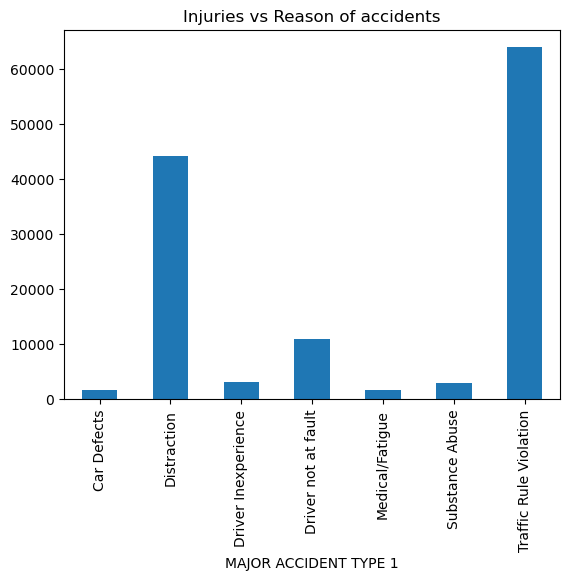

In [6]:
df3.plot.bar()

plt.title("Injuries vs Reason of accidents")
plt.show()
